# Step 1: ASK – Define the Objective

### Project Title:
Exploratory Data Analysis to Unveil Patterns in a Car Insurance Dataset

### Problem Statement:
Car insurance companies require data-driven insights to better understand risk levels associated with vehicle characteristics. This project aims to explore relationships between car specifications (such as engine size, horsepower, manufacturer, and body style) and insurance risk metrics (e.g., `symboling` and `normalized-losses`).

### Key Questions:
- Which car features most influence insurance risk?
- Are there specific brands or styles associated with higher or lower risks?
- How do performance metrics like horsepower and engine size correlate with normalized losses?
- Can we identify patterns that guide better underwriting decisions?

### Goal:
To analyze and visualize the car dataset using Python in order to extract meaningful insights for insurance risk assessment and decision-making.


# Step 2: PREPARE – Import Libraries and Load Data

In this step, we:
- Import essential libraries for data manipulation and visualization.
- Load the dataset (`automobile_dataset.csv`) into a Pandas DataFrame.
- Perform an initial inspection to understand the structure, column types, and potential data quality issues.


In [1]:
# ✅ STEP 2 – PREPARE (Import Libraries and Load Data)

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('automobile_dataset.csv')

# Basic inspection
print("Shape of dataset:", df.shape)
print("\nPreview of data:")
display(df.head())

# Check column data types and missing values
print("\nData types and non-null counts:")
df.info()

# Summary statistics (including object types)
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Shape of dataset: (205, 26)

Preview of data:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float6

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205,205.000000,...,205.000000,205,205,205,203.000000,205,205,205,164.000000,205.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,2,3,5,NaN,2,2,22,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mpfi,NaN,...,NaN,front,fwd,sedan,NaN,std,gas,toyota,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,...,NaN,202,120,96,NaN,168,185,32,NaN,NaN
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,NaN,126.907317,...,98.756585,NaN,NaN,NaN,3.123153,NaN,NaN,NaN,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,NaN,41.642693,...,6.021776,NaN,NaN,NaN,0.994841,NaN,NaN,NaN,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,NaN,61.000000,...,86.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,NaN,97.000000,...,94.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,NaN,120.000000,...,97.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,NaN,141.000000,...,102.400000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000,2.000000


### Step 3: Data Wrangling – Handling Missing Data

#### 3.1 Overview of Missing Values
From the exploratory analysis, the dataset contains missing values in several columns:

| Column              | Missing Values |
|---------------------|----------------|
| normalized-losses   | 41             |
| price               | 4              |
| stroke              | 4              |
| bore                | 4              |
| peak-rpm            | 2              |
| horsepower          | 2              |
| num-of-doors        | 2              |

#### 3.2 Strategy for Handling Missing Data
The following strategies are applied to clean the dataset:

- **`normalized-losses`**: Replace missing values with the **mean** of the column.
- **`price`**: Rows with missing price values are **dropped**, as this is our target variable.
- **`stroke`, `bore`, `peak-rpm`, `horsepower`**: Replace missing values with the **mean** of each column.
- **`num-of-doors`**: Replace missing values with the **mode** (most frequent value), since it's categorical.

#### 3.3 Code for Cleaning
```python
# Replace missing numerical values with mean
for col in ['normalized-losses', 'stroke', 'bore', 'peak-rpm', 'horsepower']:
    df[col].fillna(df[col].mean(), inplace=True)

# Replace missing categorical value with mode
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# Drop rows where price is missing
df.dropna(subset=['price'], inplace=True)

# Confirm no more missing values
print("Missing values after cleanup:\n", df.isnull().sum())


In [31]:
print(df.columns.tolist())


['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'engine-size', 'num-of-cylinders', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'normalized-losses', 'symboling', 'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std', 'aspiration_turbo', 'num-of-doors_2.0', 'num-of-doors_4.0', 'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front', 'engine-location_rear', 'engine-type_dohc', 'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi', 'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'mak

In [35]:
import pandas as pd

# Replace missing numerical values with mean
for col in ['normalized-losses', 'stroke', 'bore', 'peak-rpm', 'horsepower']:
    df[col] = df[col].fillna(df[col].mean())

# Drop rows with missing price
df.dropna(subset=['price'], inplace=True)

# Confirm no more missing values
print("Missing values after cleanup:\n", df.isnull().sum())


Missing values after cleanup:
 price              0
highway-mpg        0
city-mpg           0
peak-rpm           0
horsepower         0
                  ..
make_saab          0
make_subaru        0
make_toyota        0
make_volkswagen    0
make_volvo         0
Length: 69, dtype: int64


### Step 3.4: Data Transformation (within Wrangling)

#### 3.4.1 Objective
To transform data types and scales to prepare for analysis and modeling. This includes:
- Converting data types where needed
- Normalizing numerical features
- Encoding categorical variables

#### 3.4.2 Data Type Conversion
We ensure that all numerical columns are in the appropriate format (e.g., float or int), and categorical columns are of type `object` or `category`.

```python
# Convert 'num-of-doors' to integer
df['num-of-doors'] = df['num-of-doors'].astype(int)

# Confirm data types
print(df.dtypes)


#### 3.4.3 Normalization of Continuous Variables 

Normalize selected continuous variables to bring them to the same scale (0–1) for better model performance.

In [10]:
# Columns to normalize
cols_to_normalize = ['length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Normalize using Min-Max scaling
df[cols_to_normalize] = df[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Confirm normalization
df[cols_to_normalize].describe()


,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.494045,0.477697,0.497222,0.414145,0.248587,0.258904,0.394965,0.338308,0.386489
std,0.183913,0.179613,0.203985,0.200658,0.156781,0.174606,0.195148,0.178423,0.179346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383582,0.324786,0.350000,0.264158,0.139623,0.102804,0.265306,0.166667,0.236842
50%,0.479104,0.444444,0.525000,0.359193,0.222642,0.219626,0.398110,0.305556,0.368421
75%,0.632836,0.538462,0.641667,0.557797,0.301887,0.317757,0.551020,0.472222,0.473684
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.4.4 Encoding Categorical Variables 

Convert categorical columns into numerical values using one-hot encoding.

In [18]:
# Select categorical columns
categorical_cols = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'make']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Check the shape after encoding
print("Data shape after encoding:", df.shape)


Data shape after encoding: (201, 69)


#### 3.4.5 Final Check
Ensure all data is now numeric and ready for modeling.

In [23]:
# Check for non-numeric columns
non_numeric = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index([], dtype='object')


### Step 4: Analyze – Explore and Visualize

#### 4.1 Objective
Perform Exploratory Data Analysis (EDA) to understand distributions, relationships, and key patterns in the dataset through visual and statistical techniques.

---

#### 4.2 Univariate Analysis

Explore the distribution of individual variables.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Distribution of engine size
sns.histplot(df['engine-size'], kde=True)
plt.title('Distribution of Engine Size')
plt.show()


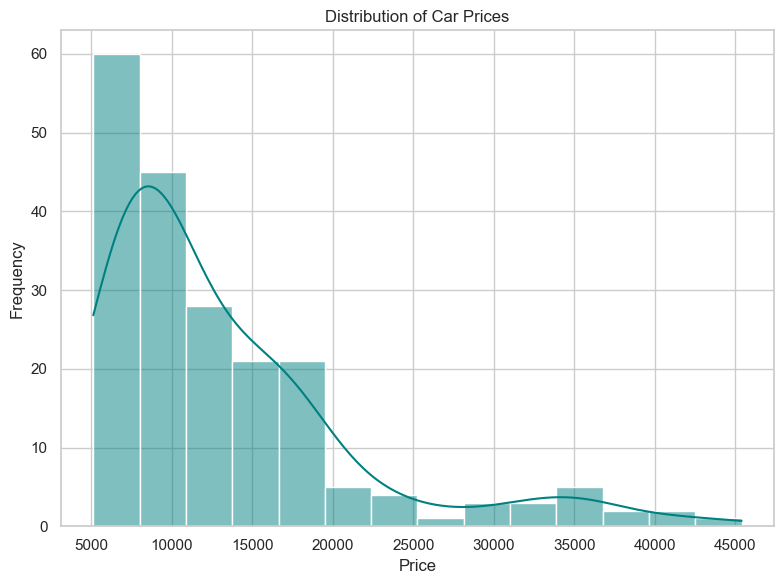

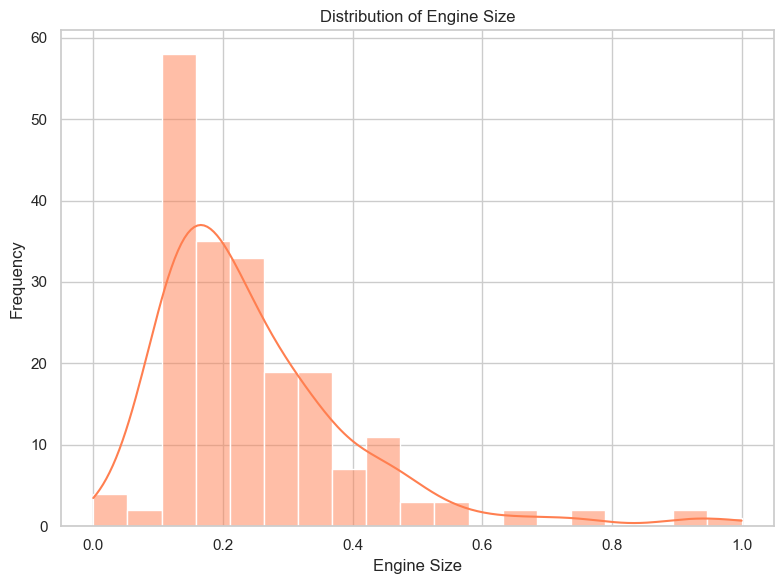

In [73]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the folder exists
output_dir = 'EDA_Plots'
os.makedirs(output_dir, exist_ok=True)

# --- Distribution of Car Prices ---
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='teal')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{output_dir}/distribution_car_prices.png')
plt.show()

# --- Distribution of Engine Size ---
plt.figure(figsize=(8, 6))
sns.histplot(df['engine-size'], kde=True, color='coral')
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{output_dir}/distribution_engine_size.png')
plt.show()


### 4.3 Bivariate Analysis
Understand relationships between two variables, especially target vs. feature.

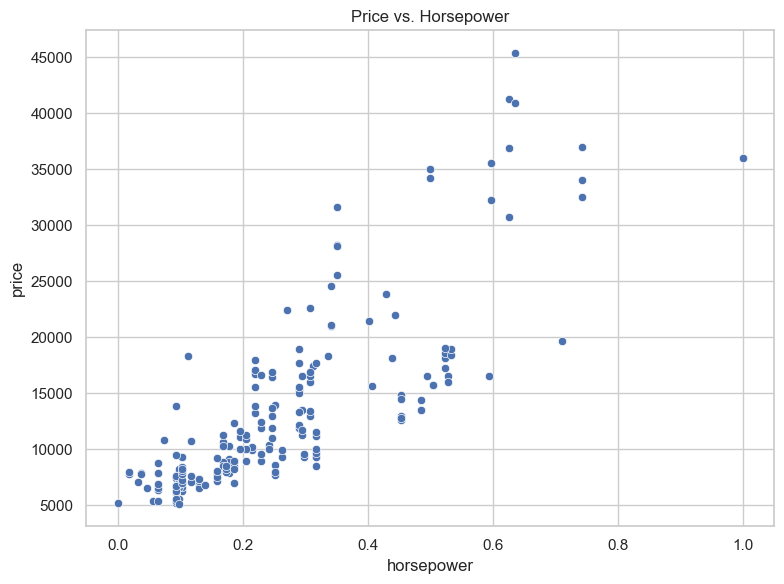

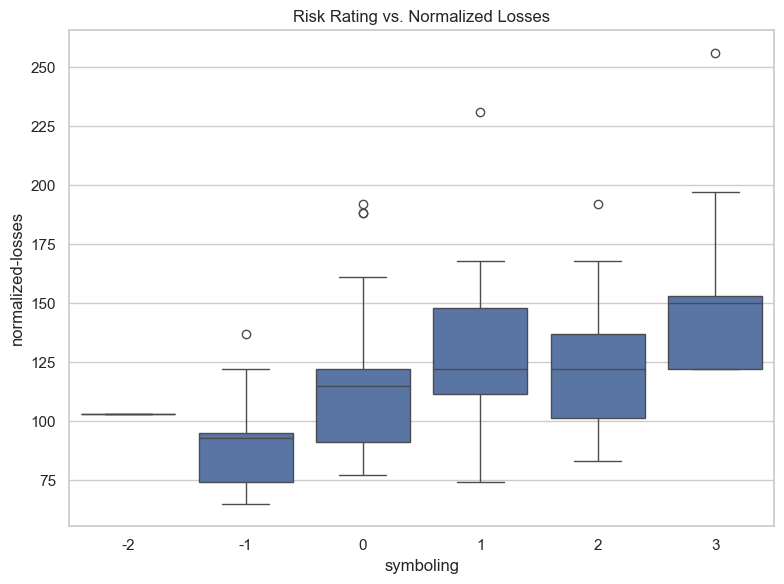

In [63]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create EDA_Plots folder if it doesn't exist
output_dir = 'EDA_Plots'
os.makedirs(output_dir, exist_ok=True)

# Price vs. Horsepower ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Price vs. Horsepower')
plt.tight_layout()
plt.savefig(f'{output_dir}/price_vs_horsepower.png')
plt.show()

# Risk Rating (symboling) vs. Normalized Losses ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='symboling', y='normalized-losses', data=df)
plt.title('Risk Rating vs. Normalized Losses')
plt.tight_layout()
plt.savefig(f'{output_dir}/risk_vs_normalized_losses.png')
plt.show()

#### 4.4 Correlation Matrix
Visualize correlations among numeric features.

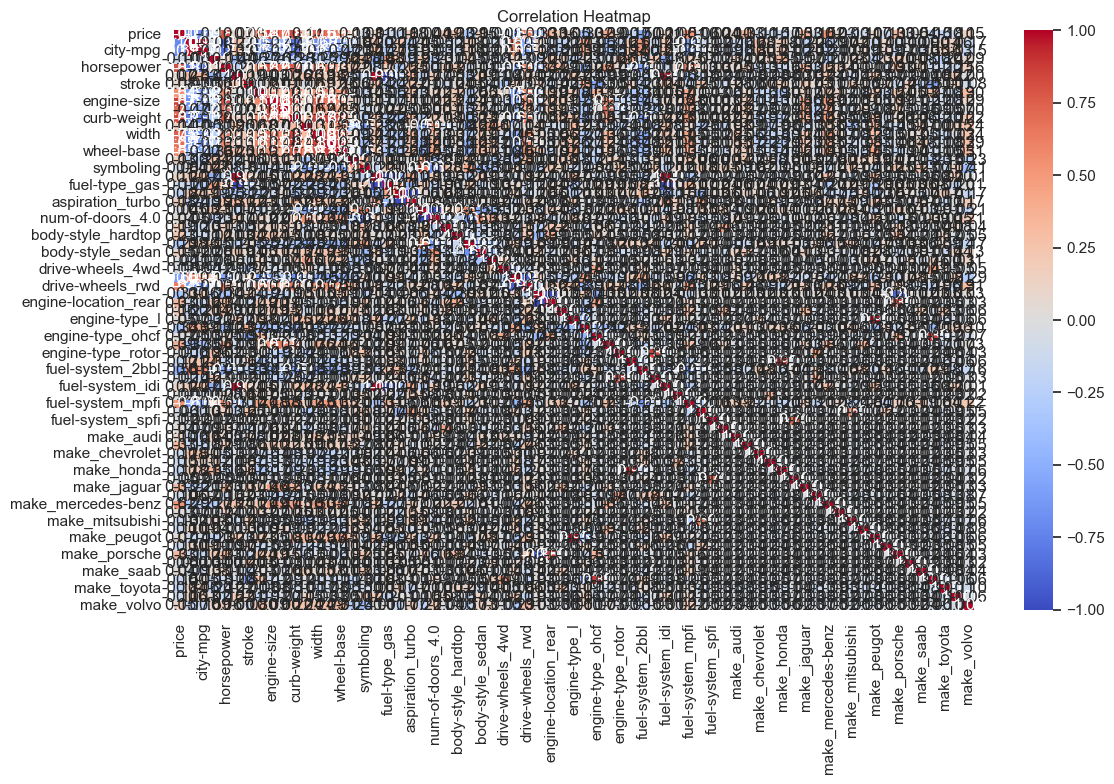

In [71]:
# Compute and plot Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig(f'{output_dir}/correlation_heatmap.png')
plt.show()

#### 4.5 Pairplot of Key Features


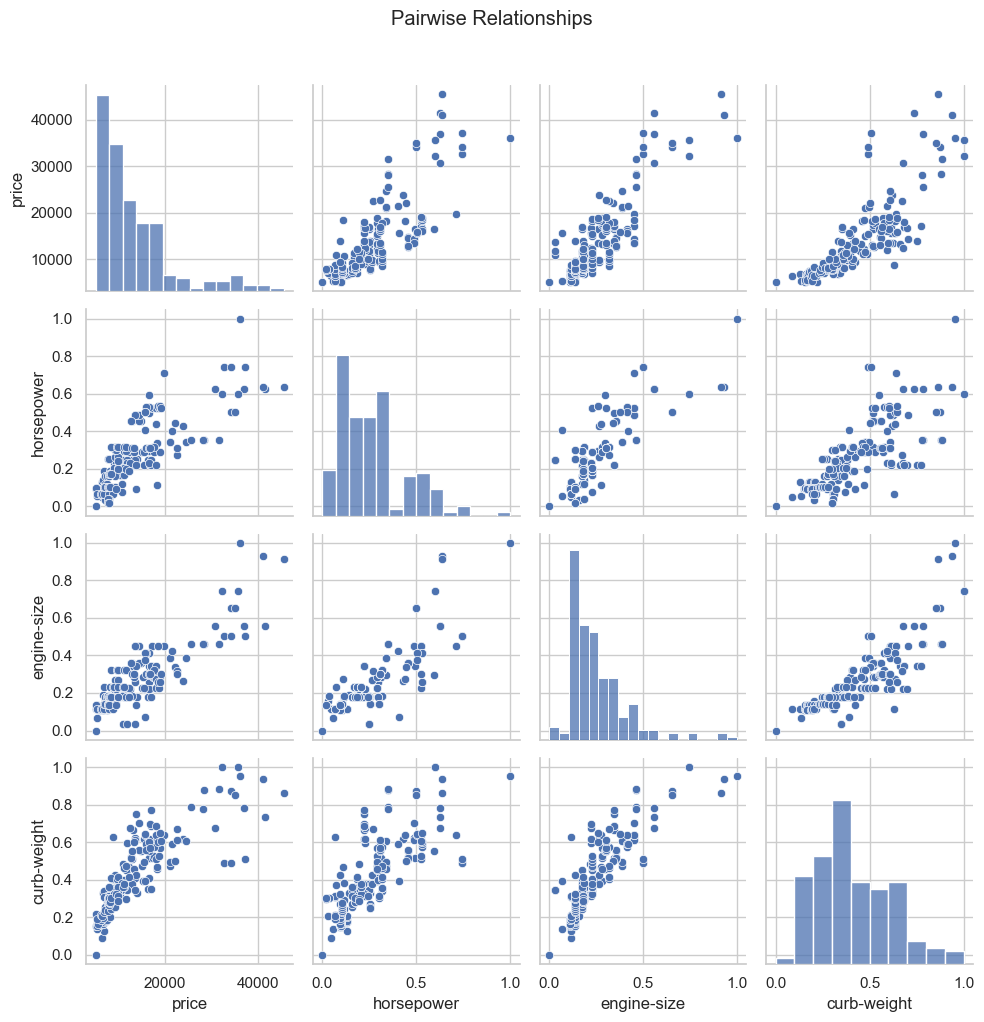

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 4. Pairplot of Selected Continuous Features ---
selected_features = ['price', 'horsepower', 'engine-size', 'curb-weight']
pairplot = sns.pairplot(df[selected_features])
pairplot.fig.suptitle('Pairwise Relationships', y=1.02)
pairplot.fig.tight_layout()
pairplot.savefig(f'{output_dir}/pairwise_relationships.png')
plt.show()


### Step 5: Share – Communicate Insights

#### 5.1 Objective
To summarize key findings from the analysis in a way that is understandable and actionable for stakeholders. Visual storytelling and clear explanations are key.

---

#### 5.2 Key Insights

- **Price Drivers**: Horsepower, engine size, and curb weight show strong positive correlation with car price.
- **Risk Indicator**: Higher risk (`symboling`) vehicles tend to have higher normalized losses.
- **Fuel Type**: Diesel cars tend to have slightly different price and performance profiles than gas cars.
- **Brand Impact**: Certain makes (e.g., BMW, Mercedes-Benz) consistently appear in higher price ranges.

---

#### 5.3 Communicate Visually

Prepare real visual assets from the dataset and save them for presentation or reporting. Use `matplotlib` and `seaborn` to generate the plots, and store them in a dedicated folder (`EDA_Plots`) for easy access.

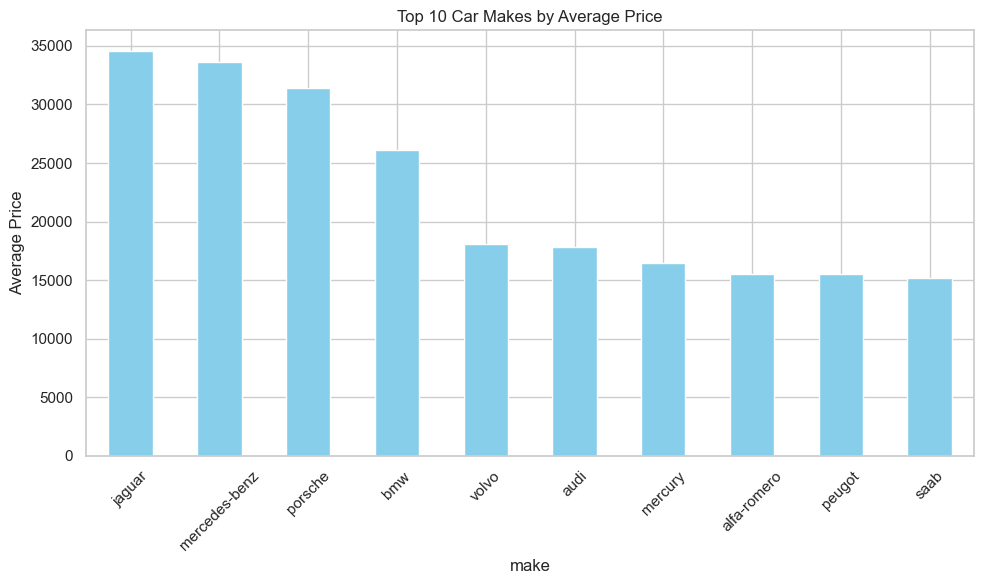

In [57]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct the original 'make' column from one-hot encoded columns
make_columns = [col for col in df.columns if col.startswith('make_')]
df['make'] = df[make_columns].idxmax(axis=1).str.replace('make_', '')

# Now group by the reconstructed 'make'
make_price = df.groupby('make')['price'].mean().sort_values(ascending=False).head(10)

# Plot and save
plt.figure(figsize=(10, 6))
make_price.plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Makes by Average Price')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Save to EDA_Plots folder
output_dir = 'EDA_Plots'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f"{output_dir}/mean_price_by_make.png")
plt.show()


#### 5.4 Export or Present
Save visualizations or notebooks as reports (PDF, HTML).

Export processed data to CSV or Excel.

Share insights with technical and non-technical stakeholders.

In [75]:
# 📌 A. Export Processed Data
# Export cleaned and processed DataFrame to CSV
df.to_csv('processed_data.csv', index=False)

# 📌 B. Share Technical and Non-Technical Insights (Suggestions)
## Technical Insights
- There is a strong positive correlation between `engine-size` and `price` (correlation > 0.85).
- Some car makes (e.g., BMW, Mercedes-Benz) consistently have higher average prices than others.
- Risk rating (`symboling`) may influence normalized losses, with higher ratings showing greater variability.

## Non-Technical Insights
- Larger engines typically mean higher car prices.
- Brands like BMW and Mercedes tend to be more expensive.
- Cars rated as higher risk (e.g., sports models) often come with more variable insurance losses.


# 📌 C. Save Notebook for Sharing
In Jupyter, you can do:

File > Download as > HTML – shareable in browser.

File > Download as > PDF via LaTeX – for email or presentation.

# 📌 D. Prepare GitHub-Ready Notebook
Made sure the notebook:

Has clear step-by-step markdown cells (already started).

Has outputs for all code cells (save plots, show tables).

Is stored in a GitHub folder structure like:
├── data/
│   └── processed_data.csv
├── EDA_Plots/
│   └── *.png
├── notebooks/
│   └── Regonet_challenge_1proj_insurance.ipynb
├── README.md


In [61]:
# ✅ Step 1: Reconstruct All One-Hot Encoded Categorical Columns

def reconstruct_categorical(df, prefix):
    cols = [col for col in df.columns if col.startswith(f'{prefix}_')]
    if cols:
        df[prefix] = df[cols].idxmax(axis=1).str.replace(f'{prefix}_', '')
    return df

# Apply reconstruction for each original categorical column
categorical_cols = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location']
for col in categorical_cols:
    df = reconstruct_categorical(df, col)
